In [16]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
load_dotenv(dotenv_path='C:/Users/panka/Documents/Aug11thTUClass/.env.txt')

True

In [11]:
api_key = os.getenv("NEWS_API_KEY")
api_key

'224e1e86ef3a471191effbb44b5346d3'

In [12]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [13]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="Bitcoin, BTC",
    language="en"
)

# Show the total number of news
bitcoin_news["totalResults"]

2673

In [20]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum, ETH",
    language="en"
)

# Show the total number of news
ethereum_news["totalResults"]

2149

In [21]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"].lower()
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        
        bitcoin_sentiments.append({"Compound": compound, "Positive": pos, "Neutral": neu, "Negative": neg, "Text": text})
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)
btc_df.head()

,Compound,Positive,Neutral,Negative,Text
0,0.1779,0.046,0.954,0.000,"london, aug 18 (reuters) - blockchain company ..."
1,-0.7845,0.000,0.807,0.193,"the deck, dated july 2022, reveals that babel ..."
2,0.2023,0.052,0.948,0.000,speculation is that some investors have turned...
3,-0.1280,0.066,0.826,0.107,cryptocurrency is seeing massive downturns tha...
4,-0.1779,0.035,0.912,0.054,ive been writing about cryptocurrency for my e...


In [22]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"].lower()
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        
        ethereum_sentiments.append({"Compound": compound, "Positive": pos, "Neutral": neu, "Negative": neg, "Text": text})
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)
eth_df.head()

,Compound,Positive,Neutral,Negative,Text
0,-0.9366,0.000,0.646,0.354,"scams and frauds are ubiquitous in crypto, but..."
1,-0.2960,0.060,0.820,0.120,a big-time nft investor who owns 57 digital ar...
2,0.0000,0.000,1.000,0.000,the highly anticipated ethereum merge that is ...
3,0.2023,0.048,0.952,0.000,"the ethereum merge is significant, and not jus..."
4,-0.5267,0.000,0.876,0.124,"also, its no longer a collective\r\nimage: spi..."


In [23]:
 # Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.00000,100.000000
mean,0.209273,0.074610,0.89799,0.027370
std,0.370361,0.064063,0.07513,0.050195
min,-0.875000,0.000000,0.69200,0.000000
25%,0.000000,0.000000,0.85375,0.000000
50%,0.202300,0.068000,0.89550,0.000000
75%,0.458800,0.112000,0.94625,0.054500
max,0.807000,0.249000,1.00000,0.256000


In [24]:
 # Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.211391,0.079260,0.888320,0.032400
std,0.397990,0.067739,0.082702,0.058099
min,-0.936600,0.000000,0.646000,0.000000
25%,0.000000,0.000000,0.844500,0.000000
50%,0.307100,0.069500,0.888500,0.000000
75%,0.498075,0.137750,0.946250,0.054250
max,0.861600,0.249000,1.000000,0.354000


In [25]:
# Questions:
#Q: Which coin had the highest mean positive score?
#A: Ethereum had the highest mean positive score of 0.079 compared to BTC score of 0.074
    
#Q: Which coin had the highest compound score?
#A: Ethereum had the highest compound  score of 0.86 compared to Bitcoin score of 0.80. 
    
#Q. Which coin had the highest positive score?
#A: Both BTC and ETH had highest positive score of 0.249

In [26]:
# 2. Natural Language Processing

#In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
#Lowercase each word.Remove Punctuation.Remove Stopwords.


In [27]:
 from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union(['chars'])

In [31]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    
    return tokens

In [32]:
# Create a new tokens column for Bitcoin
btc_df["Tokens"] = btc_df["Text"].apply(tokenizer)
btc_df.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,0.1779,0.046,0.954,0.000,"london, aug 18 (reuters) - blockchain company ...","[london, aug, reuters, blockchain, company, va..."
1,-0.7845,0.000,0.807,0.193,"the deck, dated july 2022, reveals that babel ...","[deck, dated, july, reveals, babel, finance, l..."
2,0.2023,0.052,0.948,0.000,speculation is that some investors have turned...,"[speculation, investors, turned, bitcoin, orde..."
3,-0.1280,0.066,0.826,0.107,cryptocurrency is seeing massive downturns tha...,"[cryptocurrency, seeing, massive, downturns, b..."
4,-0.1779,0.035,0.912,0.054,ive been writing about cryptocurrency for my e...,"[ive, writing, cryptocurrency, entire, career,..."


In [33]:
# Create a new tokens column for Ethereum
eth_df["Tokens"] = eth_df["Text"].apply(tokenizer)
eth_df.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,-0.9366,0.000,0.646,0.354,"scams and frauds are ubiquitous in crypto, but...","[scams, frauds, ubiquitous, crypto, sometimes,..."
1,-0.2960,0.060,0.820,0.120,a big-time nft investor who owns 57 digital ar...,"[bigtime, nft, investor, owns, digital, art, p..."
2,0.0000,0.000,1.000,0.000,the highly anticipated ethereum merge that is ...,"[highly, anticipated, ethereum, merge, expecte..."
3,0.2023,0.048,0.952,0.000,"the ethereum merge is significant, and not jus...","[ethereum, merge, significant, people, crypto,..."
4,-0.5267,0.000,0.876,0.124,"also, its no longer a collective\r\nimage: spi...","[also, longer, collectiveimage, spice, daothe,..."


In [34]:
# NGrams and Frequency Analysis

In [35]:
from collections import Counter
from nltk import ngrams

In [47]:
# Extraxt bitcoin tokens
btc_tokens = btc_df['Tokens'].sum()

In [48]:
# Extract ethereum tokens
eth_tokens = eth_df['Tokens'].sum()

In [49]:
 # Generate the Bitcoin N-grams where N=2
btc_ngram= Counter(ngrams(btc_tokens, n=2))

In [50]:
# Generate the Ethereum N-grams where N=2
eth_ngram= Counter(ngrams(eth_tokens, n=2))

In [51]:
 # Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [52]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10_tokens = token_count(btc_tokens, N=10)
btc_top10_tokens

[('crypto', 41),
 ('bitcoin', 34),
 ('btc', 23),
 ('market', 21),
 ('cryptocurrency', 19),
 ('point', 18),
 ('bitcoinbtc', 18),
 ('price', 14),
 ('cryptocurrencies', 14),
 ('investors', 13)]

In [53]:
# Use token_count to get the top 10 words for Ethereum
eth_top10_tokens = token_count(eth_tokens, N=10)
eth_top10_tokens

[('crypto', 44),
 ('ethereum', 33),
 ('market', 25),
 ('merge', 19),
 ('ethereumeth', 17),
 ('cryptocurrency', 15),
 ('investors', 15),
 ('blockchain', 14),
 ('cryptocurrencies', 14),
 ('price', 12)]

In [54]:
# Word Clouds

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

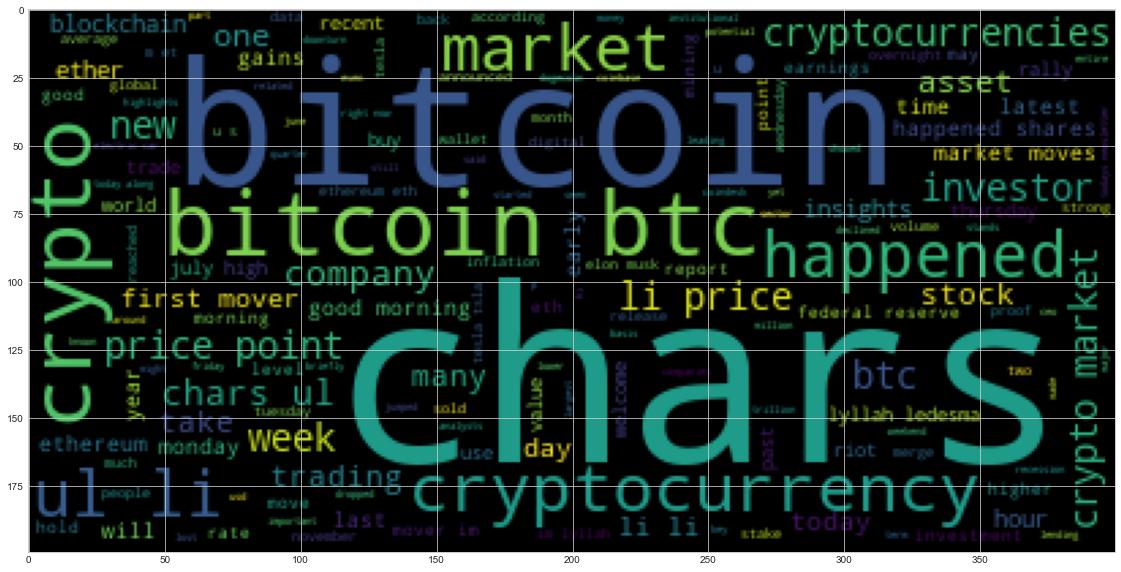

In [58]:
 # Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_df["Text"].sum())
plt.imshow(btc_wc)

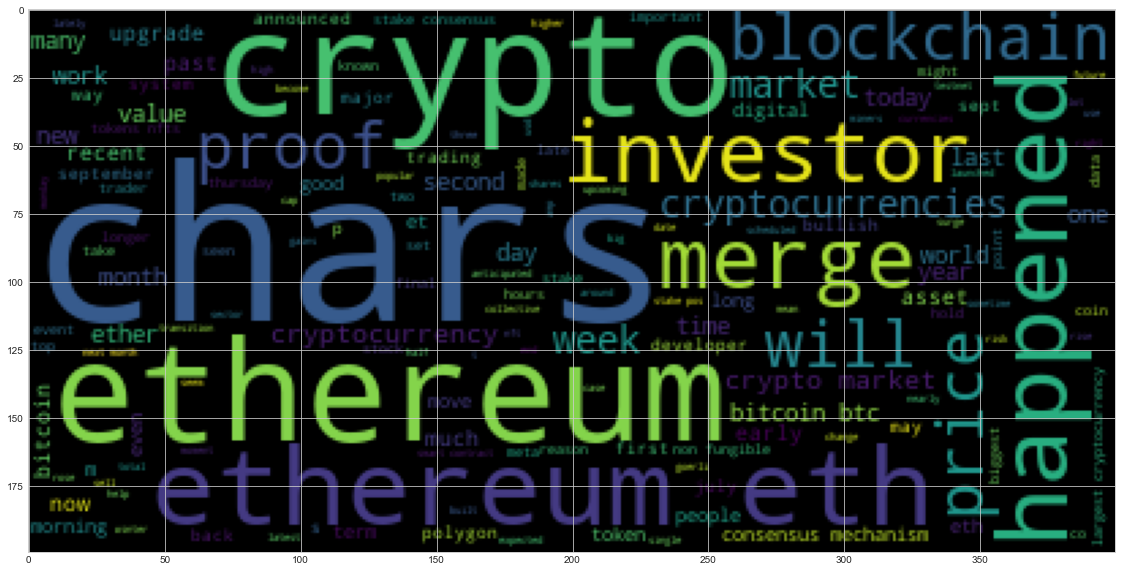

In [60]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_df["Text"].sum())
plt.imshow(eth_wc)

In [61]:
# 3. Named Entity Recognition

import spacy
from spacy import displacy

In [62]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [63]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [64]:
#  Bitcoin NER

# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df["Text"])

In [65]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_text)

# Add a title to the document
doc_btc.user_data['title'] = 'BTC Article'

In [66]:
 # Render the visualization
displacy.render(doc_btc, style='ent')

In [67]:
# List all Entities
doc_btc.ents

(london,
 aug 18,
 reuters,
 6tj.sg,
 thursday,
 24%,
 july 2022,
 more than $280 million,
 around 8,000,
 5,
 november 2021,
 two-thirds,
 $3 trillion,
 one,
 today,
 75 percent,
 this quarter,
 q2,
 approximately 75%,
 roughly $936 million,
 a related quarter two,
 wednesday,
 21,322,
 24-hour,
 $26,39 billion,
 23,536,
 last week,
 0.95%,
 the last 24 hours,
 a few months last year musk,
 one,
 thursday,
 24,748.43,
 4.81%,
 24-hour,
 first,
 tons,
 two,
 0.63%,
 recent weeks,
 50,000,
 1 p.m. et,
 today,
 7.19%,
 4.6%,
 the past 24 hours,
 the white house,
 this week,
 200-week,
 22,693.30,
 one,
 this week,
 the day,
 today,
 -6.00%,
 a stellar week,
 10:15 a.m.,
 friday,
 67%,
 just this week,
 1.46%,
 one,
 more than 3,900%,
 the past decade,
 nearly $3 trillion,
 last november,
 $1 trillion,
 today,
 july 26,
 0.53%,
 this morning,
 9.00%,
 monday,
 9%,
 as much as 16.5%,
 the early afternoon,
 toronto,
 7.95%,
 first,
 52%,
 year,
 february 2021,
 1.30%,
 6.17%,
 8.80%,
 secon

In [68]:
# Ethereum NER

# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df["Text"])

In [69]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_text)

# Add a title to the document
doc_eth.user_data['title'] = 'ETH article'

In [70]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [71]:
# List all Entities
doc_eth.ents

(wednesday,
 one,
 100,
 150,00,
 57,
 150,000,
 franklin caldwell,
 next month,
 2014,
 second,
 mid-september,
 about a month,
 2008,
 today,
 +5302 chars],
 7 p.m.,
 santa monica,
 @nftsonbitcoin,
 two,
 first,
 one,
 last week,
 3,
 dan frommer,
 ethereum(eth -1.08%,
 as early as september,
 shiba inu,
 eth 9.92%,
 -1.89%,
 september 19,
 0.20%,
 eth 5.58%,
 week,
 friday,
 global ,
 4.67%,
 ethereum(eth -4.85%,
 30%,
 just the past week,
 sept. 19,
 this week,
 the day,
 today,
 -6.68%,
 second,
 4,892,
 november 2021,
 -0.76%,
 one,
 just six,
 -4.14%,
 second,
 nasdaq,
 1.9%,
 early afternoon,
 +2542,
 second-quarter 2022,
 0.9%,
 a year ago,
 u.s.,
 tod,
 0.63%,
 recent weeks,
 50,000,
 6.33%,
 ethereum(eth -4.45%,
 more than 49%,
 the last three weeks,
 sept. 19,
 today,
 recent weeks,
 12:30 p.m. et,
 cryptocurrenciesbitcoin(btc,
 -4.00%,
 friday,
 today,
 the last 24 hours,
 more than 4%,
 early this morning,
 asian,
 -1.97%,
 -1.95%,
 -2.94%,
 the past five years,
 ethereum